In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%pylab nbagg

## Linear regression with one independent variable

### Simple linear regression
A simple linear regression uses the ordinary least squares method to determine a linear function that *predicts* the relationship  between a dependant (usually y) and independent (usually x) variable:  <div align="center"> $y_i = mx_i + \epsilon_i$ </div>

The best fit is the fit (line) such that $\sum \epsilon_i^2 = \sum (y_i - mx_i - b)^2$, or using the more typical notation for statistics, $\sum \epsilon_i^2 = \sum (y_i - \beta x_i - \alpha)^2$, is minimized. This is solved by taking the partial derivitaves of the RHS wrt $\beta$ and $\alpha$ and of course setting this to 0. One can obtain* $\beta = (\sum x_i - \bar{x})(\sum y_i - \bar{y})/\sum (x_i -\bar{x})^2$ and $\alpha = \bar{y} -\beta \bar{x}$.
*Note: If you do the algebra and get stuck see step 8 on this link http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf

If the errors are gaussian, the least squares solution is the maximum likelihood estimate. 

In [3]:
def slr(x,y):
    if type(x) == list:
        x = array(x)
    if type(y) == list:
        y = array(y)
    ybar = np.mean(y)
    xbar = np.mean(x)
    beta = np.sum((x-xbar)*(y-ybar))/np.sum((x-xbar)**2)
    alpha = ybar - beta*xbar
    liney = beta*x + alpha
    return(liney)

In [6]:
%pwd

'/Users/ondrea/OStats/Notebooks'

In [4]:
#get some data for testing
!wget -P ./data https://datahub.io/core/global-temp/r/annual.csv

--2021-05-21 12:45:10--  https://datahub.io/core/global-temp/r/annual.csv
Resolving datahub.io (datahub.io)... 104.21.40.221, 172.67.157.38
Connecting to datahub.io (datahub.io)|104.21.40.221|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv [following]
--2021-05-21 12:45:11--  https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 172.67.157.38, 104.21.40.221
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|172.67.157.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5230 (5.1K) [text/plain]
Saving to: ‘./data/annual.csv’

annual.csv          100%[===================>]   5.11K  --.-KB/s    in 0s      

2021-05-21 12:45:11 (12.0 MB/s) - ‘./data/annual.csv’ saved [5230/5230]



In [7]:
year, tempa = np.loadtxt('./data/annual.csv', skiprows=1, delimiter=",", usecols=(1,2), unpack=True)
year = np.array([int(y) for y in year]); tempa=np.array(tempa)
#month = np.loadtxt('./data/monthly_csv.csv', skiprows=1, delimiter=",", usecols=(1), unpack=True, dtype=str)

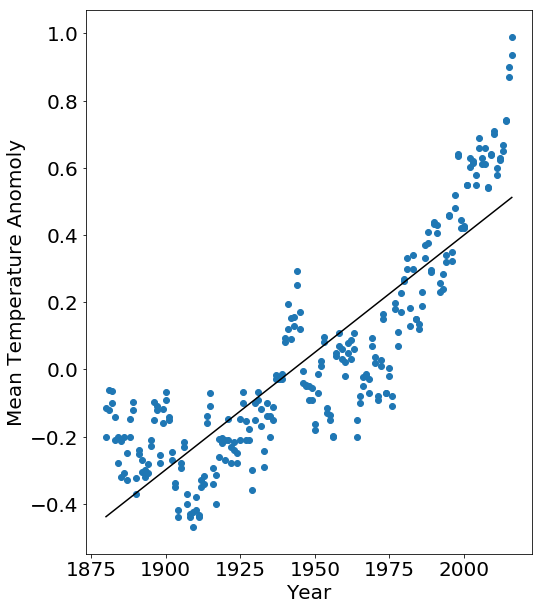

In [11]:
plt.figure(figsize=(8,10))
plt.rcParams.update({'font.size': 20})
plt.scatter(year,tempa)
plt.plot(year, slr(year,tempa), c='k')
plt.savefig('test.png')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomoly')
plt.show()
plt.close()

To generalize this, one can express this as a matrix equation as well. $\boldsymbol{Y} =\boldsymbol{ \beta X} + \boldsymbol{\epsilon}$
